In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv('RPGF3Results.csv')

C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1147115369.py:24: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1147115369.py:24: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1147115369.py:24: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPyth

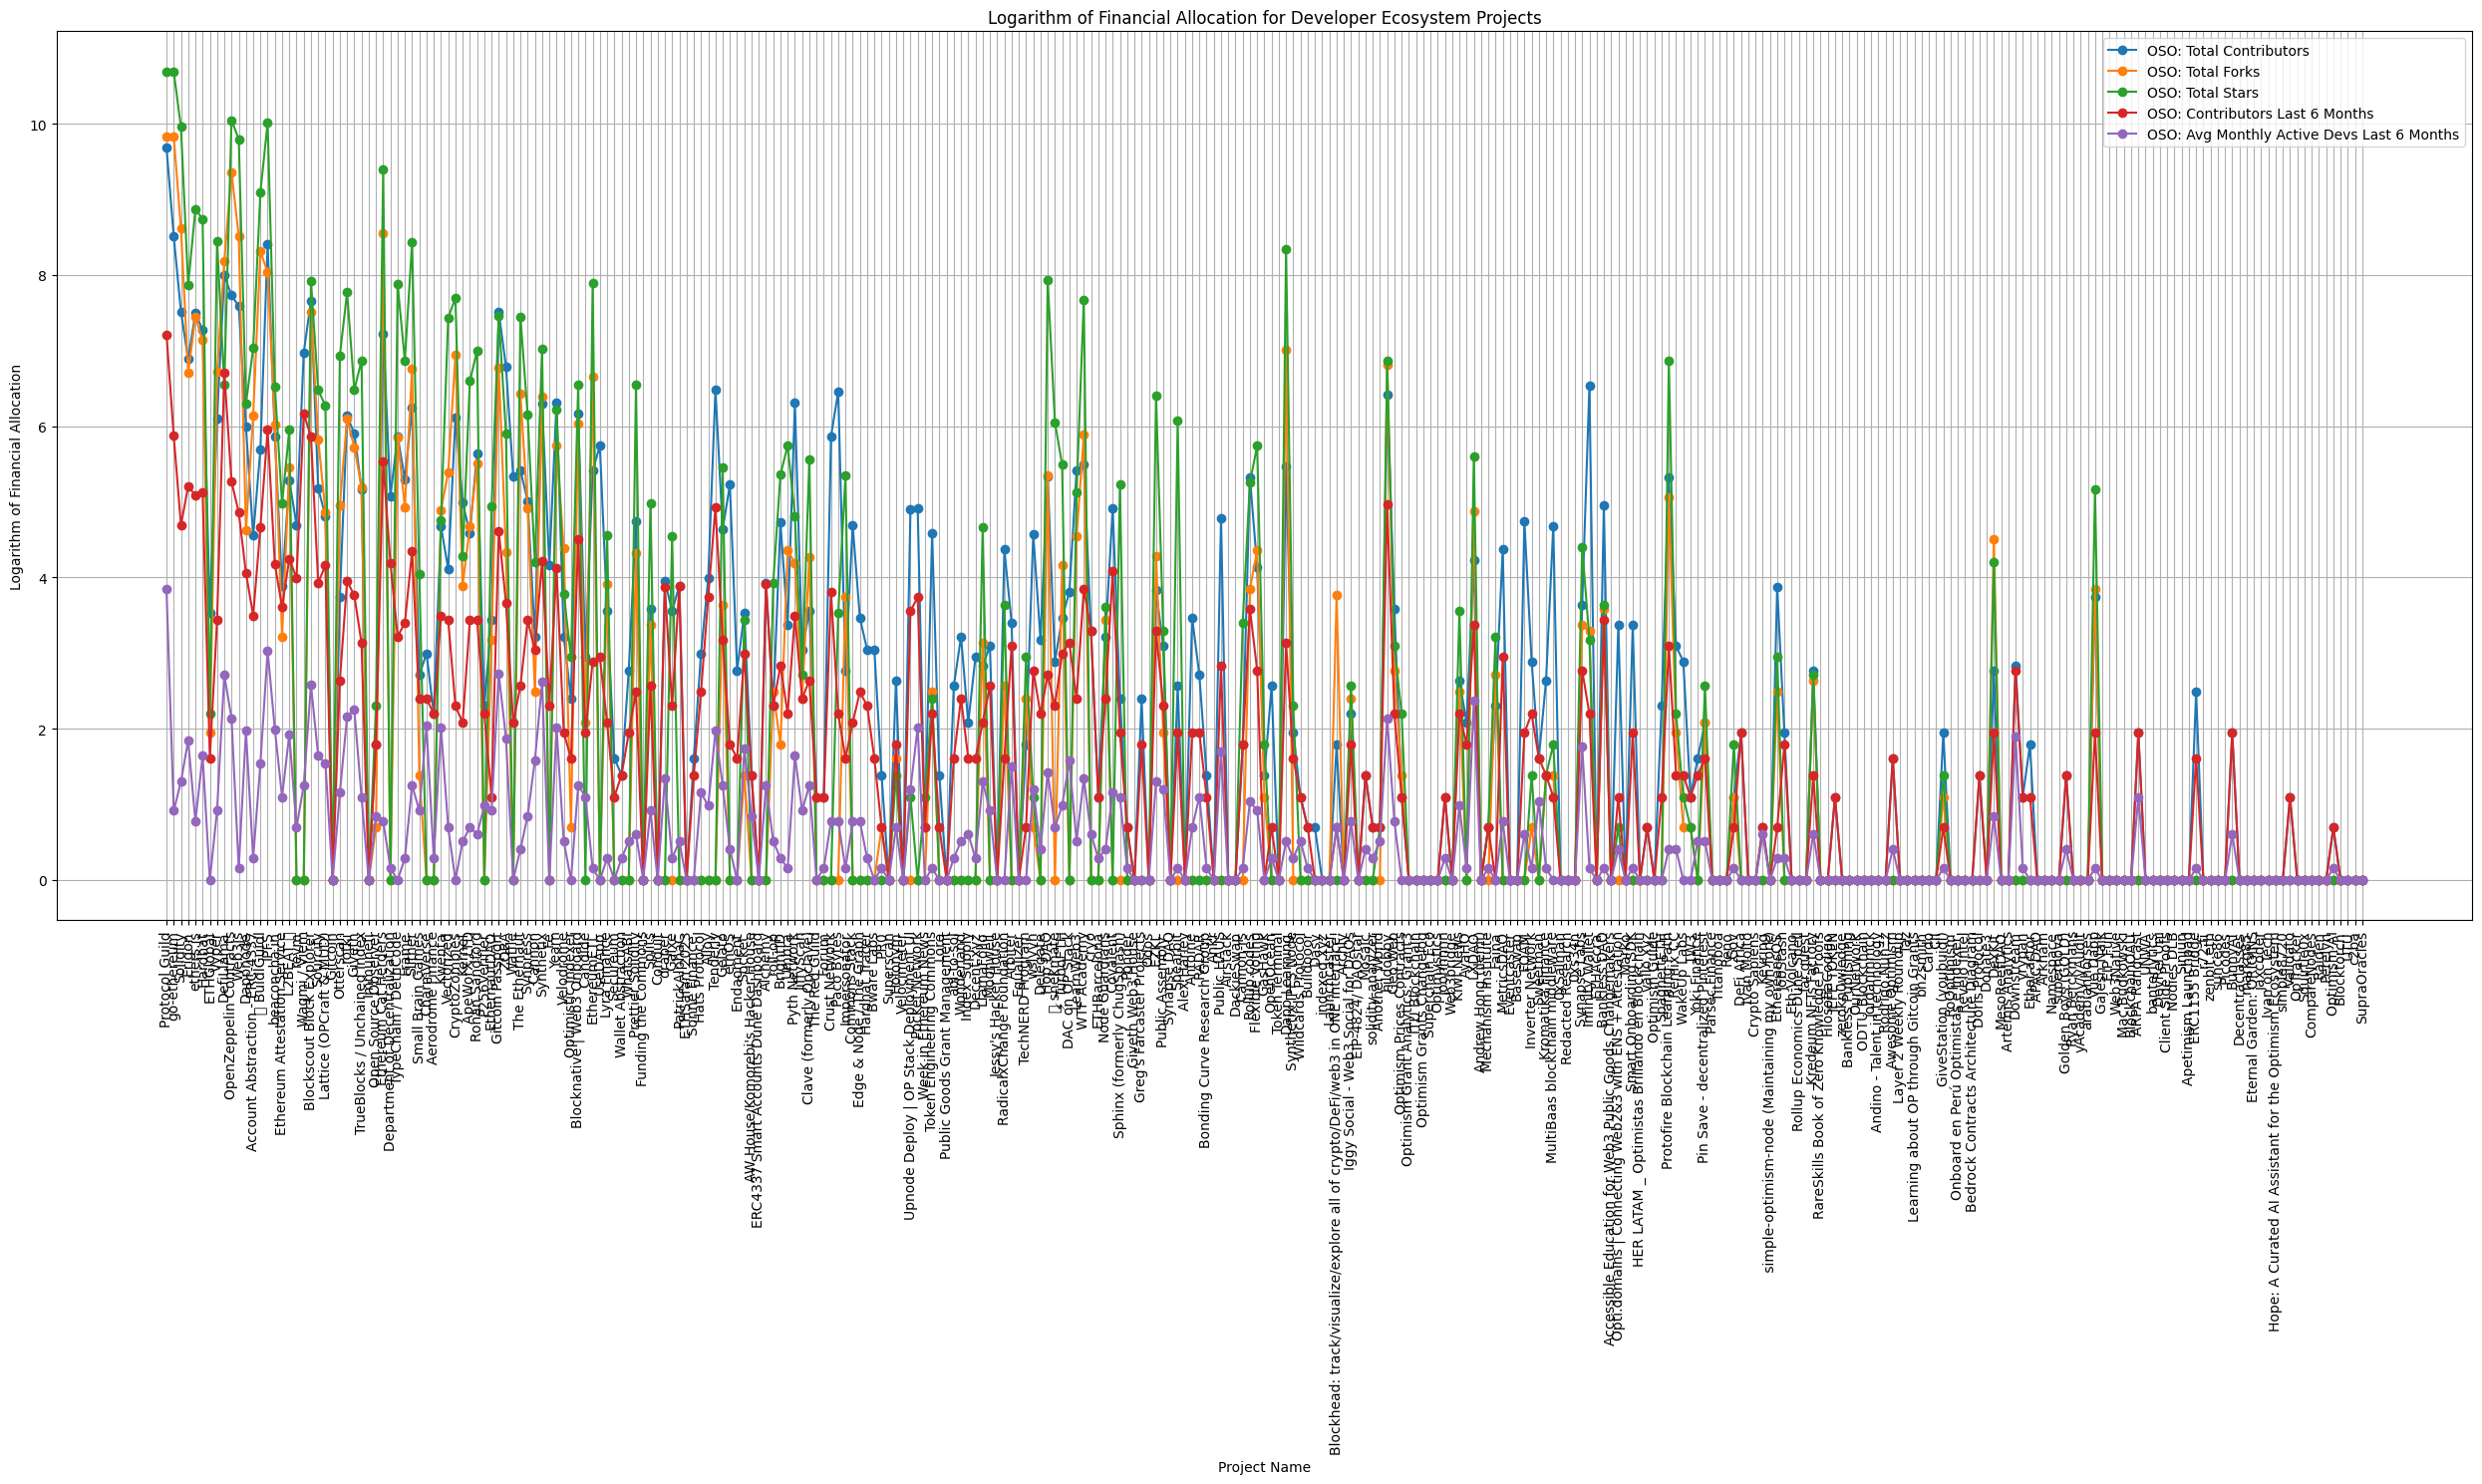

In [14]:
selected_columns = ['Meta: Project Name','Category: Developer Ecosystem', 'OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

df[selected_columns] = df[selected_columns].fillna(0)

selected_rows = df.loc[df['Category: Developer Ecosystem'] == 1, selected_columns]

columns_to_log = ['OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 
'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

for col in columns_to_log:
    selected_rows[col] = np.log(selected_rows[col] + 1)  # +1 หลีกเลี่ยง log(0)

plt.figure(figsize=(25, 15))

for col in columns_to_log:
    plt.plot(selected_rows['Meta: Project Name'], selected_rows[col], marker='o', label=col)

plt.title('Logarithm of Financial Allocation for Developer Ecosystem Projects')
plt.xlabel('Project Name')
plt.ylabel('Logarithm of Financial Allocation')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
selected_columns = ['Meta: Project Name','Category: Developer Ecosystem', 'OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

df[selected_columns] = df[selected_columns].fillna(0)

selected_rows = df.loc[df['Category: Developer Ecosystem'] == 1, selected_columns]

columns_to_log = ['OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

for col in columns_to_log:
    selected_rows[col] = np.log(selected_rows[col] + 1)  # +1 หลีกเลี่ยง log(0)

selected_rows['Allocation'] = selected_rows[columns_to_log].sum(axis=1)

total_allocation = 30000000

allocation_ratio = total_allocation / selected_rows['Allocation'].sum()

selected_rows['Total Allocation'] = (selected_rows['Allocation'] * allocation_ratio).round(2).astype(float)
# pd.set_option('display.max_rows', None)
selected_rows

Meta: Project Name  Category: Developer Ecosystem  \
0       Protocol Guild                              1   
1          go-ethereum                              1   
2             Solidity                              1   
3               Erigon                              1   
4            ethers.js                              1   
..                 ...                            ...   
615        Optimism AI                              1   
634         Blocktorch                              1   
637                UTU                              1   
639               c2ba                              1   
640       SupraOracles                              1   

     OSO: Total Contributors  OSO: Total Forks  OSO: Total Stars  \
0                   9.684896          9.834673         10.687617   
1                   8.509564          9.834673         10.687617   
2                   7.514800          8.613412          9.954941   
3                   6.886532          6.703188          7.867106   
4                   7.495542          7.447168          8.867287   
..                       ...               ...               ...   
615                 0.693147          0.000000          0.000000   
634                 0.000000          0.000000          0.000000   
637                 0.000000          0.000000          0.000000   
639                 0.000000          0.000000          0.000000   
640                 0.000000          0.000000          0.000000   

     OSO: Contributors Last 6 Months  \
0                           7.213032   
1                           5.872118   
2                           4.691348   
3                           5.204007   
4                           5.087596   
..                               ...   
615                         0.693147   
634                         0.000000   
637                         0.000000   
639                         0.000000   
640                         0.000000   

     OSO: Avg Monthly Active Devs Last 6 Months  Allocation  Total Allocation  
0                                      3.846595   41.266814         516726.66  
1                                      0.916291   35.820263         448527.12  
2                                      1.299283   32.073784         401615.18  
3                                      1.845827   28.506659         356949.06  
4                                      0.773190   29.670783         371525.77  
..                                          ...         ...               ...  
615                                    0.154151    1.540445          19288.84  
634                                    0.000000    0.000000              0.00  
637                                    0.000000    0.000000              0.00  
639                                    0.000000    0.000000              0.00  
640                                    0.000000    0.000000              0.00  

[305 rows x 9 columns]

In [26]:
allocation_sum = selected_rows['Allocation'].sum()
print("Allocation:", allocation_sum)

Allocation: 2395.8593853058724


In [25]:
total_allocation_sum = selected_rows['Total Allocation'].sum()
print("Total Allocation:", total_allocation_sum)

Total Allocation: 30000000.0


In [18]:
plt.figure(figsize=(30, 15))
plt.bar(selected_rows['Meta: Project Name'], selected_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1954756874.py:7: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1954756874.py:7: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\1954756874.py:7: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\2561821270.py:9: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\2561821270.py:9: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\2561821270.py:9: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

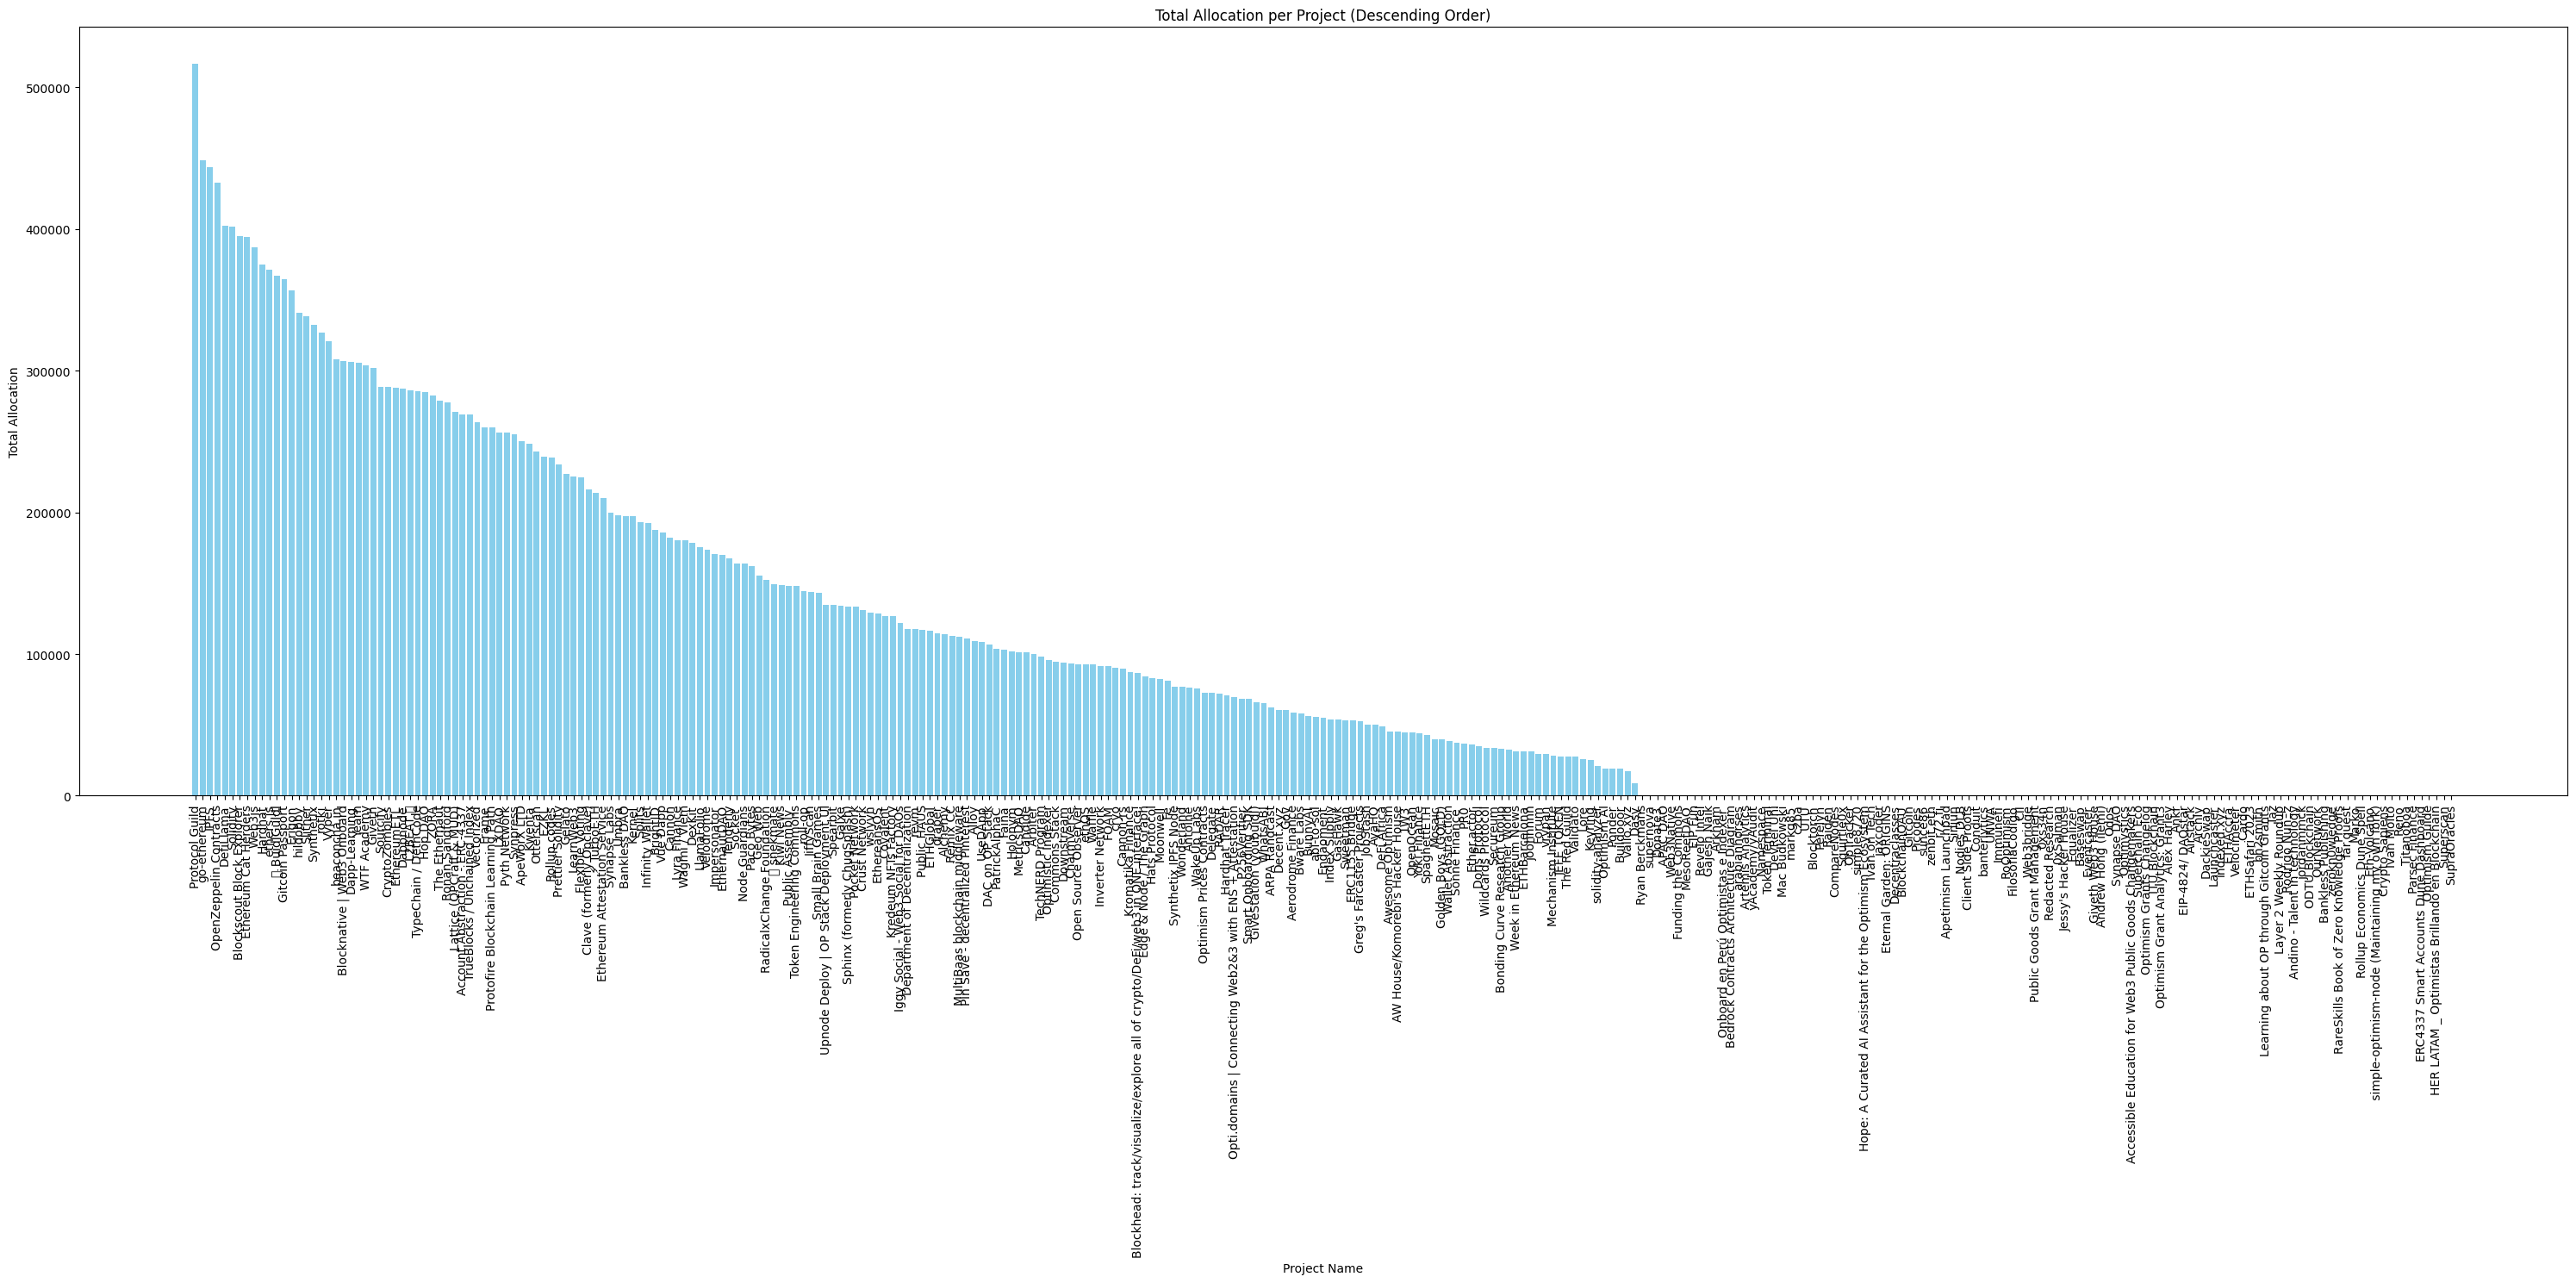

In [19]:
sorted_rows = selected_rows.sort_values(by='Total Allocation', ascending=False)

plt.figure(figsize=(30, 15))
plt.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project (Descending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# filtered_rows = selected_rows[selected_rows['Total Allocation'] < 100000]
# sorted_rows = filtered_rows.sort_values(by='Total Allocation', ascending=False)

# plt.figure(figsize=(30, 15))
# plt.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
# plt.xlabel('Project Name')
# plt.ylabel('Total Allocation')
# plt.title('Total Allocation per Project (Descending Order)')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


In [21]:
# describeed = selected_rows.describe()
# describeed

In [22]:
# median = selected_rows.median()
# median

C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\627374271.py:11: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\627374271.py:11: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\627374271.py:11: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

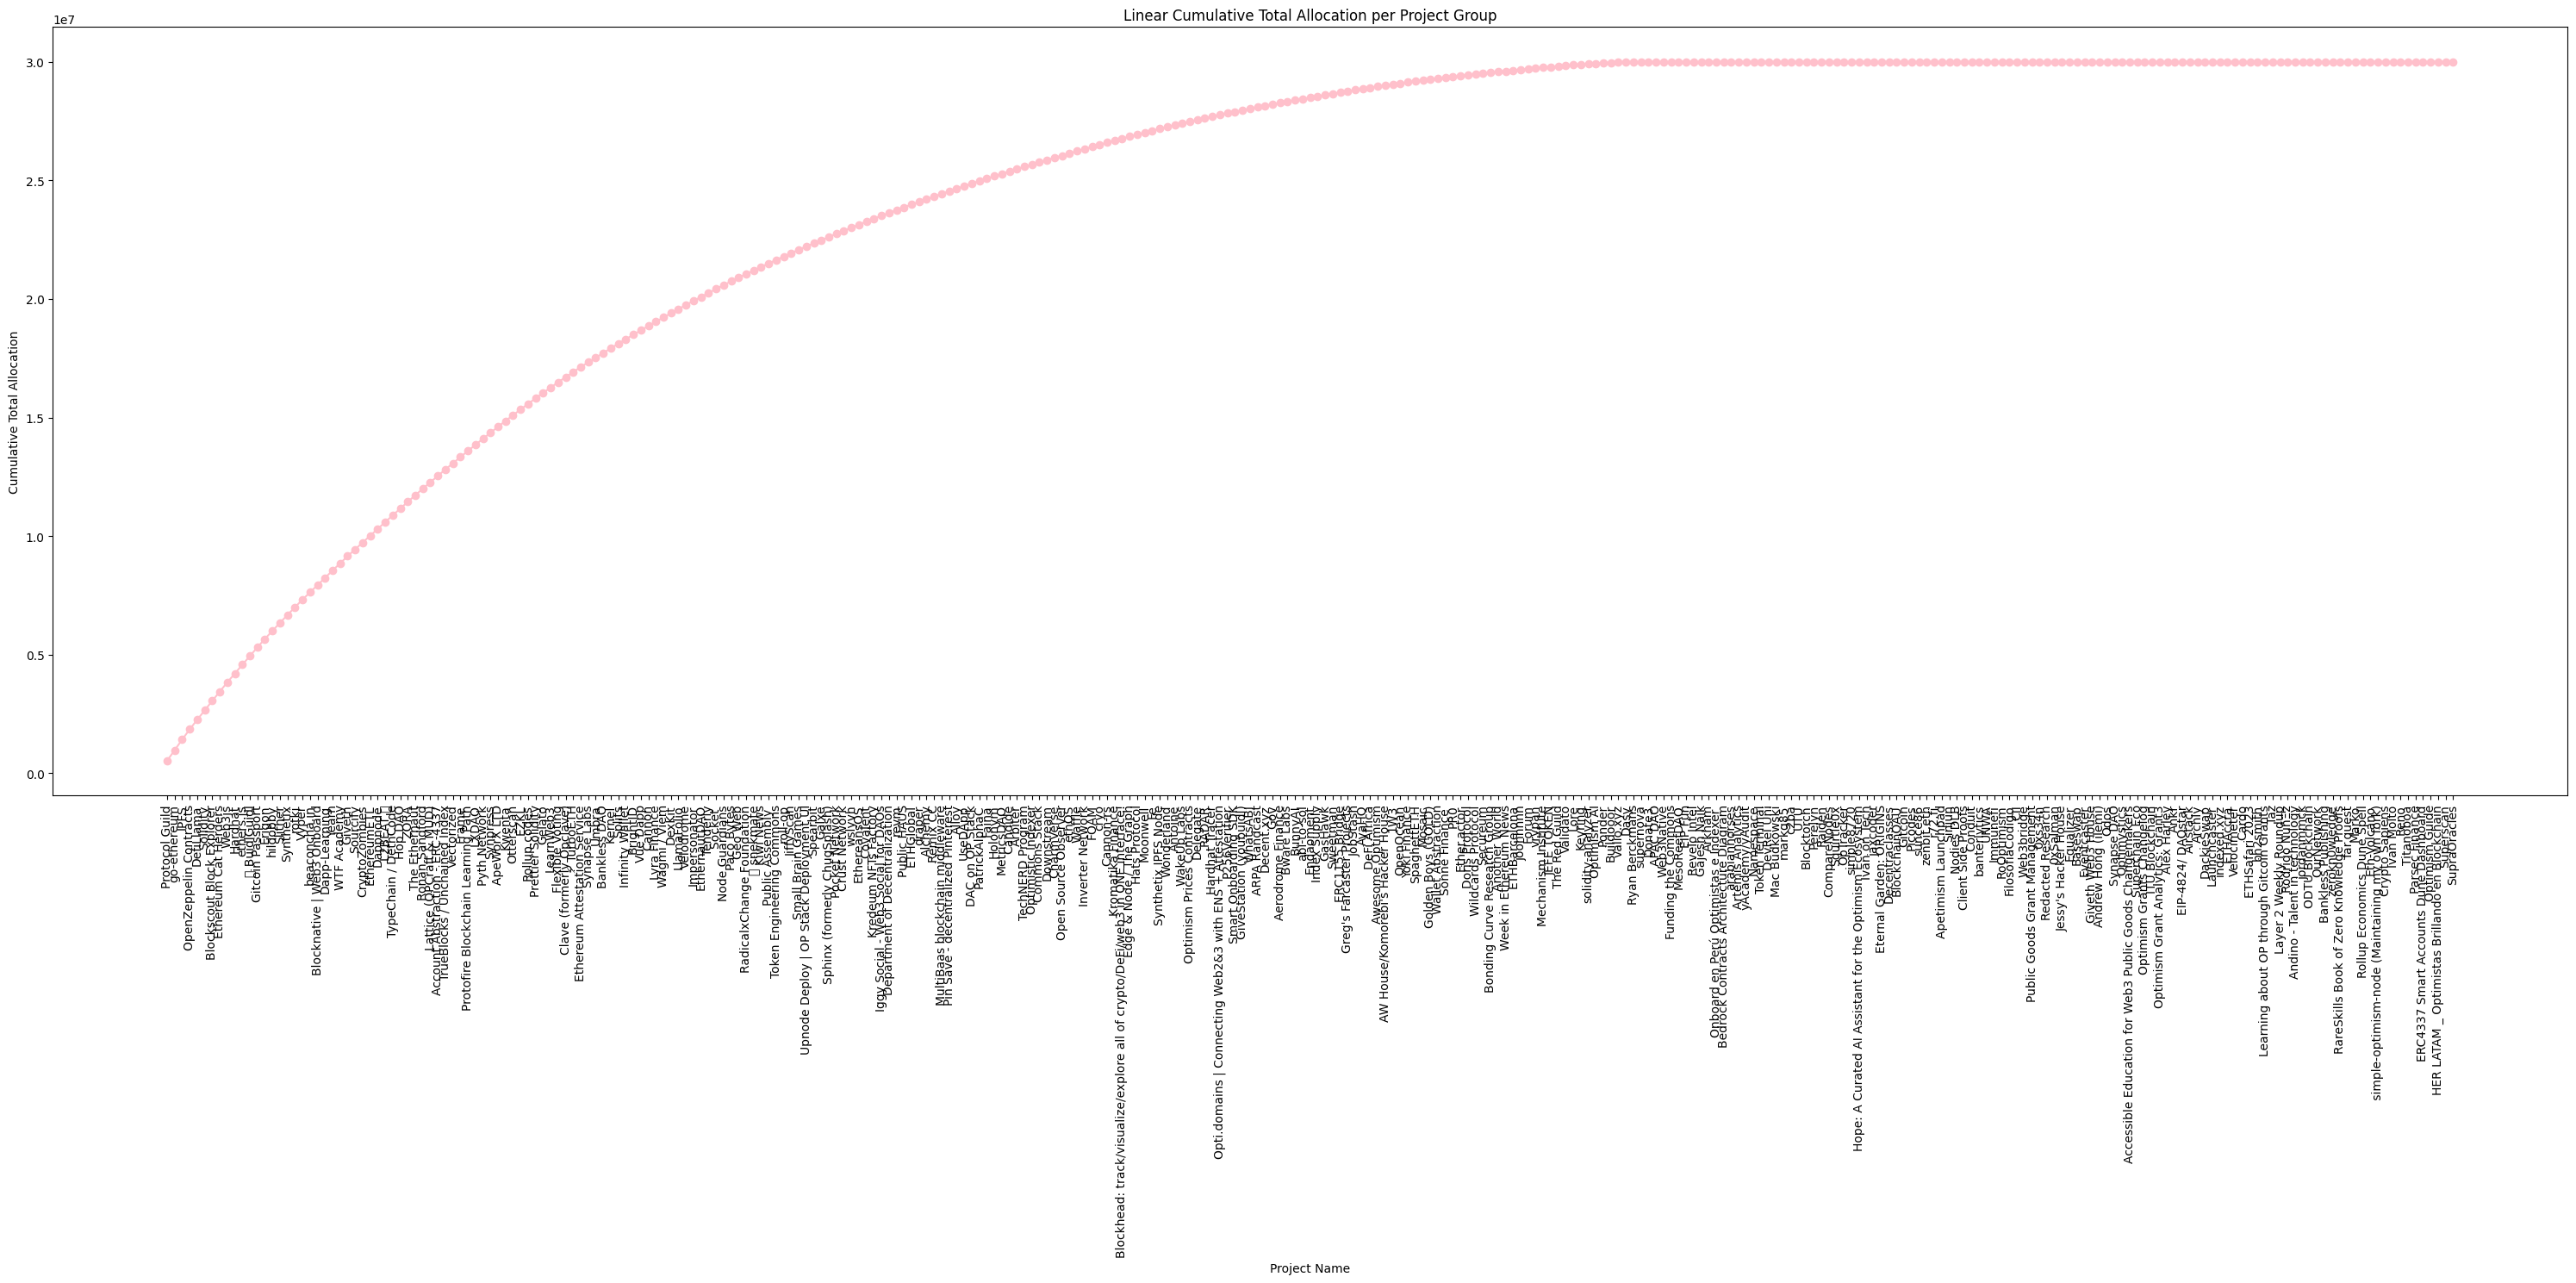

In [23]:
cumulative_df = sorted_rows[['Meta: Project Name', 'Total Allocation']].copy()

cumulative_df['Cumulative Total Allocation'] = cumulative_df['Total Allocation'].cumsum()

plt.figure(figsize=(30, 15))
plt.plot(cumulative_df['Meta: Project Name'], cumulative_df['Cumulative Total Allocation'], marker='o', linestyle='-', color = 'pink')
plt.xlabel('Project Name')
plt.ylabel('Cumulative Total Allocation')
plt.title('Linear Cumulative Total Allocation per Project Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\242822621.py:12: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\242822621.py:12: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_19088\242822621.py:12: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

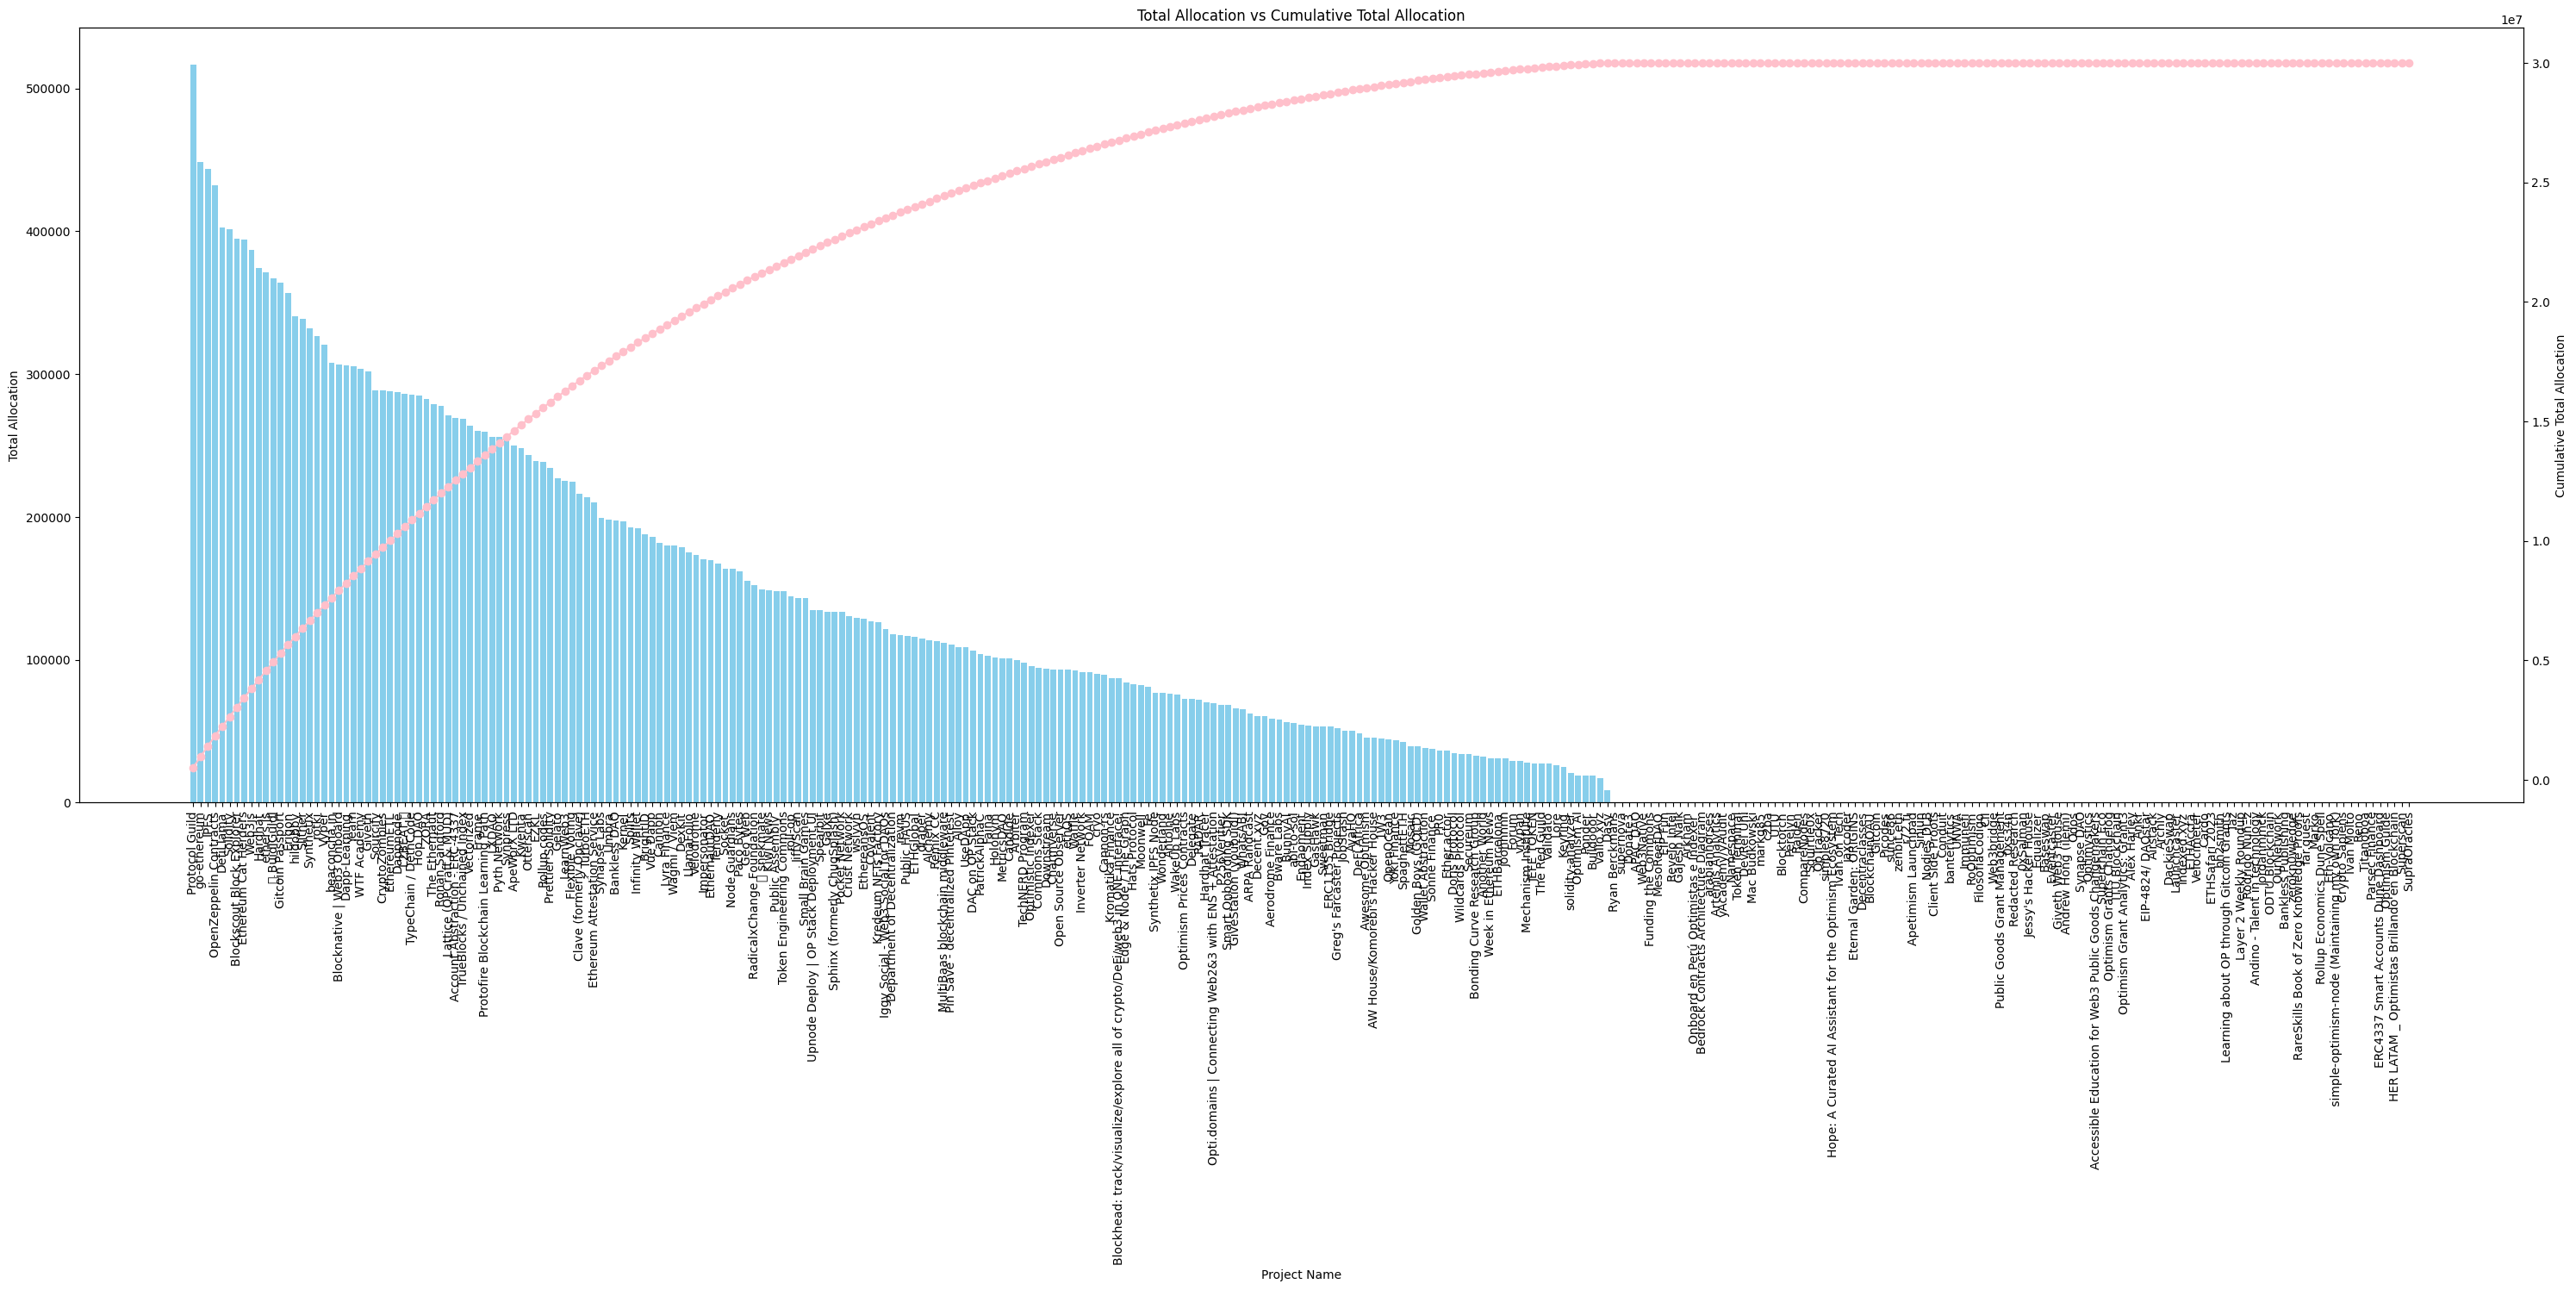

In [24]:
fig, ax1 = plt.subplots(figsize=(30, 15))

ax1.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
ax1.set_xlabel('Project Name')
ax1.set_ylabel('Total Allocation')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(cumulative_df['Meta: Project Name'], cumulative_df['Cumulative Total Allocation'], marker='o', linestyle='-', color='pink')
ax2.set_ylabel('Cumulative Total Allocation')

fig.tight_layout()
plt.title('Total Allocation vs Cumulative Total Allocation')
plt.show()
